## Loading Data

In [49]:
import os
import ast
import typing
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from datetime import date, datetime

pd.set_option('display.max_columns', None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
months = ['Gener', 'Febrer', 'Marc', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']

In [4]:
#os.makedirs('./bicing', exist_ok=True)

#if not len(os.listdir('./bicing')):
#    i2m = list(zip(range(1,13), months))
#    for year in [2023, 2022, 2021, 2020, 2019]:
#        for month, month_name in i2m:        
#            os.system(f"wget 'https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z'")
#            os.system(f"7z x '{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z'")
#            os.system(f"mv '{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.csv' './data' ")
#            os.system(f"rm './data/{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z'")

In [52]:
if not os.path.isdir("data"):
    os.makedirs("data")

if not len(os.listdir('./data')):
    i2m = list(zip(range(1,13), months))
    os.chdir("data")
    for year in [2023, 2022, 2021, 2020, 2019]:
        for month, month_name in i2m:        
            os.system(f"wget 'https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z'")
            os.system(f"7z x '{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z'")
            os.system(f"rm '{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z'")
    os.chdir("..")

--2023-06-18 11:26:47--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_01_Gener_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22666599 (22M) [application/x-7z-compressed]
Saving to: '2023_01_Gener_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.36M 16s
    50K .......... .......... .......... .......... ..........  0% 1.23M 17s
   100K .......... .......... .......... .......... ..........  0% 61.9M 11s
   150K .......... .......... .......... .......... ..........  0% 2.93M 10s
   200K .......... .......... .......... .......... ..........  1% 1.90M 10s
   250K .......... .......... .......... .......... ..........  1% 23.5M 9s
   300K .......... .......... .......... .....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 22666599 bytes (22 MiB)

Extracting archive: 2023_01_Gener_BicingNou_ESTACIONS.7z
--
Path = 2023_01_Gener_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 22666599
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       265053242
Compressed: 22666599


--2023-06-18 11:26:51--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_02_Febrer_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22816534 (22M) [application/x-7z-compressed]
Saving to: '2023_02_Febrer_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 17s
    50K .......... .......... .......... .......... ..........  0% 1.26M 17s
   100K .......... .......... .......... .......... ..........  0% 38.6M 12s
   150K .......... .......... .......... .......... ..........  0% 73.2M 9s
   200K .......... .......... .......... .......... ..........  1% 1.26M 10s
   250K .......... .......... .......... .......... ..........  1% 10.3M 9s
   300K .......... .......... .......... ....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 22816534 bytes (22 MiB)

Extracting archive: 2023_02_Febrer_BicingNou_ESTACIONS.7z
--
Path = 2023_02_Febrer_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 22816534
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       265138589
Compressed: 22816534


--2023-06-18 11:26:55--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_03_Marc_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24177077 (23M) [application/x-7z-compressed]
Saving to: '2023_03_Marc_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.24M 19s
    50K .......... .......... .......... .......... ..........  0% 1.27M 18s
   100K .......... .......... .......... .......... ..........  0% 35.5M 12s
   150K .......... .......... .......... .......... ..........  0% 74.4M 9s
   200K .......... .......... .......... .......... ..........  1% 1.31M 11s
   250K .......... .......... .......... .......... ..........  1% 66.9M 9s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24177077 bytes (24 MiB)

Extracting archive: 2023_03_Marc_BicingNou_ESTACIONS.7z
--
Path = 2023_03_Marc_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24177077
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       280034612
Compressed: 24177077


--2023-06-18 11:27:00--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_04_Abril_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20467162 (20M) [application/x-7z-compressed]
Saving to: '2023_04_Abril_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.31M 15s
    50K .......... .......... .......... .......... ..........  0% 1.29M 15s
   100K .......... .......... .......... .......... ..........  0% 31.3M 10s
   150K .......... .......... .......... .......... ..........  1% 48.2M 8s
   200K .......... .......... .......... .......... ..........  1% 1.34M 9s
   250K .......... .......... .......... .......... ..........  1% 58.2M 8s
   300K .......... .......... .......... .......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 20467162 bytes (20 MiB)

Extracting archive: 2023_04_Abril_BicingNou_ESTACIONS.7z
--
Path = 2023_04_Abril_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 20467162
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       235284952
Compressed: 20467162


--2023-06-18 11:27:03--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_05_Maig_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24235825 (23M) [application/x-7z-compressed]
Saving to: '2023_05_Maig_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.30M 18s
    50K .......... .......... .......... .......... ..........  0% 1.26M 18s
   100K .......... .......... .......... .......... ..........  0% 75.9M 12s
   150K .......... .......... .......... .......... ..........  0% 40.2M 9s
   200K .......... .......... .......... .......... ..........  1% 1.28M 11s
   250K .......... .......... .......... .......... ..........  1% 47.0M 9s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24235825 bytes (24 MiB)

Extracting archive: 2023_05_Maig_BicingNou_ESTACIONS.7z
--
Path = 2023_05_Maig_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24235825
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       274912745
Compressed: 24235825


--2023-06-18 11:27:07--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_06_Juny_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-18 11:27:07 ERROR 404: Not Found.


ERROR: No such file or directory
2023_06_Juny_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_06_Juny_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:27:07--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_07_Juliol_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


404 Not Found
2023-06-18 11:27:08 ERROR 404: Not Found.


ERROR: No such file or directory
2023_07_Juliol_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_07_Juliol_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:27:08--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_08_Agost_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


404 Not Found
2023-06-18 11:27:08 ERROR 404: Not Found.


ERROR: No such file or directory
2023_08_Agost_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_08_Agost_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:27:08--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_09_Setembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


404 Not Found
2023-06-18 11:27:08 ERROR 404: Not Found.


ERROR: No such file or directory
2023_09_Setembre_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_09_Setembre_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:27:08--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_10_Octubre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


404 Not Found
2023-06-18 11:27:08 ERROR 404: Not Found.


ERROR: No such file or directory
2023_10_Octubre_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_10_Octubre_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:27:08--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_11_Novembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-18 11:27:09 ERROR 404: Not Found.


ERROR: No such file or directory
2023_11_Novembre_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_11_Novembre_BicingNou_ESTACIONS.7z: No such file or directory



7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


--2023-06-18 11:27:09--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2023_12_Desembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-18 11:27:09 ERROR 404: Not Found.


ERROR: No such file or directory
2023_12_Desembre_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2023_12_Desembre_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:27:09--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_01_Gener_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.



7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


HTTP request sent, awaiting response... 200 OK
Length: 24717623 (24M) [application/x-7z-compressed]
Saving to: '2022_01_Gener_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 18s
    50K .......... .......... .......... .......... ..........  0% 1.28M 18s
   100K .......... .......... .......... .......... ..........  0% 38.3M 12s
   150K .......... .......... .......... .......... ..........  0% 74.9M 9s
   200K .......... .......... .......... .......... ..........  1% 1.33M 11s
   250K .......... .......... .......... .......... ..........  1% 34.1M 9s
   300K .......... .......... .......... .......... ..........  1%  115M 8s
   350K .......... .......... .......... .......... ..........  1% 72.9M 7s
   400K .......... .......... .......... .......... ..........  1% 1.33M 8s
   450K .......... .......... .......... .......... ..........  2%  115M 7s
   500K .......... .......... .......... .......... ..........  2% 55.9M 7s
   550K .


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24717623 bytes (24 MiB)

Extracting archive: 2022_01_Gener_BicingNou_ESTACIONS.7z
--
Path = 2022_01_Gener_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24717623
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       286302280
Compressed: 24717623


--2023-06-18 11:27:15--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_02_Febrer_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22728861 (22M) [application/x-7z-compressed]
Saving to: '2022_02_Febrer_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0%  883K 25s
    50K .......... .......... .......... .......... ..........  0% 1.30M 21s
   100K .......... .......... .......... .......... ..........  0% 64.8M 14s
   150K .......... .......... .......... .......... ..........  0% 33.5M 11s
   200K .......... .......... .......... .......... ..........  1% 1.29M 12s
   250K .......... .......... .......... .......... ..........  1% 53.7M 10s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 22728861 bytes (22 MiB)

Extracting archive: 2022_02_Febrer_BicingNou_ESTACIONS.7z
--
Path = 2022_02_Febrer_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 22728861
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       256592209
Compressed: 22728861


--2023-06-18 11:27:19--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_03_Marc_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25816125 (25M) [application/x-7z-compressed]
Saving to: '2022_03_Marc_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 19s
    50K .......... .......... .......... .......... ..........  0% 1.29M 19s
   100K .......... .......... .......... .......... ..........  0% 31.1M 13s
   150K .......... .......... .......... .......... ..........  0% 47.8M 10s
   200K .......... .......... .......... .......... ..........  0% 1.31M 12s
   250K .......... .......... .......... .......... ..........  1% 37.4M 10s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 25816125 bytes (25 MiB)

Extracting archive: 2022_03_Marc_BicingNou_ESTACIONS.7z
--
Path = 2022_03_Marc_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 25816125
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       295622335
Compressed: 25816125


--2023-06-18 11:27:26--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_04_Abril_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24729204 (24M) [application/x-7z-compressed]
Saving to: '2022_04_Abril_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.30M 18s
    50K .......... .......... .......... .......... ..........  0% 1.27M 18s
   100K .......... .......... .......... .......... ..........  0% 42.0M 12s
   150K .......... .......... .......... .......... ..........  0% 64.4M 9s
   200K .......... .......... .......... .......... ..........  1% 1.32M 11s
   250K .......... .......... .......... .......... ..........  1% 57.6M 9s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24729204 bytes (24 MiB)

Extracting archive: 2022_04_Abril_BicingNou_ESTACIONS.7z
--
Path = 2022_04_Abril_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24729204
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       284615566
Compressed: 24729204


--2023-06-18 11:27:30--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_05_Maig_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26075636 (25M) [application/x-7z-compressed]
Saving to: '2022_05_Maig_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.38M 18s
    50K .......... .......... .......... .......... ..........  0% 1.29M 19s
   100K .......... .......... .......... .......... ..........  0% 48.0M 13s
   150K .......... .......... .......... .......... ..........  0% 39.8M 10s
   200K .......... .......... .......... .......... ..........  0% 1.30M 11s
   250K .......... .......... .......... .......... ..........  1% 41.8M 10s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 26075636 bytes (25 MiB)

Extracting archive: 2022_05_Maig_BicingNou_ESTACIONS.7z
--
Path = 2022_05_Maig_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 26075636
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       294327180
Compressed: 26075636


--2023-06-18 11:27:34--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_06_Juny_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25394828 (24M) [application/x-7z-compressed]
Saving to: '2022_06_Juny_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0%  937K 26s
    50K .......... .......... .......... .......... ..........  0% 1.28M 23s
   100K .......... .......... .......... .......... ..........  0% 39.3M 15s
   150K .......... .......... .......... .......... ..........  0% 74.8M 11s
   200K .......... .......... .......... .......... ..........  1% 1.30M 13s
   250K .......... .......... .......... .......... ..........  1% 48.5M 11s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 25394828 bytes (25 MiB)

Extracting archive: 2022_06_Juny_BicingNou_ESTACIONS.7z
--
Path = 2022_06_Juny_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 25394828
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       284595859
Compressed: 25394828


--2023-06-18 11:27:39--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_07_Juliol_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25933602 (25M) [application/x-7z-compressed]
Saving to: '2022_07_Juliol_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.31M 19s
    50K .......... .......... .......... .......... ..........  0% 1.28M 19s
   100K .......... .......... .......... .......... ..........  0% 43.8M 13s
   150K .......... .......... .......... .......... ..........  0% 41.8M 10s
   200K .......... .......... .......... .......... ..........  0% 1.34M 11s
   250K .......... .......... .......... .......... ..........  1% 45.8M 10s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 25933602 bytes (25 MiB)

Extracting archive: 2022_07_Juliol_BicingNou_ESTACIONS.7z
--
Path = 2022_07_Juliol_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 25933602
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       293383759
Compressed: 25933602


--2023-06-18 11:27:43--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_08_Agost_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25049057 (24M) [application/x-7z-compressed]
Saving to: '2022_08_Agost_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 19s
    50K .......... .......... .......... .......... ..........  0% 1.29M 18s
   100K .......... .......... .......... .......... ..........  0% 38.5M 13s
   150K .......... .......... .......... .......... ..........  0% 25.8M 10s
   200K .......... .......... .......... .......... ..........  1% 1.37M 11s
   250K .......... .......... .......... .......... ..........  1% 48.5M 9s
   300K .......... .......... .......... .....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 25049057 bytes (24 MiB)

Extracting archive: 2022_08_Agost_BicingNou_ESTACIONS.7z
--
Path = 2022_08_Agost_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 25049057
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       292484590
Compressed: 25049057


--2023-06-18 11:27:47--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_09_Setembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24760833 (24M) [application/x-7z-compressed]
Saving to: '2022_09_Setembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 18s
    50K .......... .......... .......... .......... ..........  0% 1.29M 18s
   100K .......... .......... .......... .......... ..........  0% 47.1M 12s
   150K .......... .......... .......... .......... ..........  0% 22.9M 9s
   200K .......... .......... .......... .......... ..........  1% 1.34M 11s
   250K .......... .......... .......... .......... ..........  1% 30.9M 9s
   300K .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24760833 bytes (24 MiB)

Extracting archive: 2022_09_Setembre_BicingNou_ESTACIONS.7z
--
Path = 2022_09_Setembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24760833
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       283149406
Compressed: 24760833


--2023-06-18 11:27:51--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_10_Octubre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24623149 (23M) [application/x-7z-compressed]
Saving to: '2022_10_Octubre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.30M 18s
    50K .......... .......... .......... .......... ..........  0% 1.28M 18s
   100K .......... .......... .......... .......... ..........  0% 36.2M 12s
   150K .......... .......... .......... .......... ..........  0% 27.6M 9s
   200K .......... .......... .......... .......... ..........  1% 1.36M 11s
   250K .......... .......... .......... .......... ..........  1% 21.7M 9s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24623149 bytes (24 MiB)

Extracting archive: 2022_10_Octubre_BicingNou_ESTACIONS.7z
--
Path = 2022_10_Octubre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24623149
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       293094456
Compressed: 24623149


--2023-06-18 11:27:56--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_11_Novembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24316083 (23M) [application/x-7z-compressed]
Saving to: '2022_11_Novembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.38M 17s
    50K .......... .......... .......... .......... ..........  0% 1.30M 17s
   100K .......... .......... .......... .......... ..........  0% 34.9M 12s
   150K .......... .......... .......... .......... ..........  0% 58.5M 9s
   200K .......... .......... .......... .......... ..........  1% 1.34M 11s
   250K .......... .......... .......... .......... ..........  1% 45.9M 9s
   300K .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24316083 bytes (24 MiB)

Extracting archive: 2022_11_Novembre_BicingNou_ESTACIONS.7z
--
Path = 2022_11_Novembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24316083
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       282698456
Compressed: 24316083


--2023-06-18 11:28:00--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2022_12_Desembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24609625 (23M) [application/x-7z-compressed]
Saving to: '2022_12_Desembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 18s
    50K .......... .......... .......... .......... ..........  0% 1.15M 19s
   100K .......... .......... .......... .......... ..........  0% 39.4M 13s
   150K .......... .......... .......... .......... ..........  0%  189M 10s
   200K .......... .......... .......... .......... ..........  1% 1.29M 11s
   250K .......... .......... .......... .......... ..........  1% 36.2M 10s
   300K .......... .......... .........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24609625 bytes (24 MiB)

Extracting archive: 2022_12_Desembre_BicingNou_ESTACIONS.7z
--
Path = 2022_12_Desembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24609625
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       294247139
Compressed: 24609625


--2023-06-18 11:28:05--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_01_Gener_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23161405 (22M) [application/x-7z-compressed]
Saving to: '2021_01_Gener_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 17s
    50K .......... .......... .......... .......... ..........  0% 1.28M 17s
   100K .......... .......... .......... .......... ..........  0% 38.2M 12s
   150K .......... .......... .......... .......... ..........  0% 28.6M 9s
   200K .......... .......... .......... .......... ..........  1% 1.32M 10s
   250K .......... .......... .......... .......... ..........  1% 27.7M 9s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 23161405 bytes (23 MiB)

Extracting archive: 2021_01_Gener_BicingNou_ESTACIONS.7z
--
Path = 2021_01_Gener_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 23161405
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       290229819
Compressed: 23161405


--2023-06-18 11:28:10--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_02_Febrer_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21231075 (20M) [application/x-7z-compressed]
Saving to: '2021_02_Febrer_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 16s
    50K .......... .......... .......... .......... ..........  0% 1.26M 16s
   100K .......... .......... .......... .......... ..........  0% 31.9M 11s
   150K .......... .......... .......... .......... ..........  0%  107M 8s
   200K .......... .......... .......... .......... ..........  1% 1.31M 9s
   250K .......... .......... .......... .......... ..........  1% 30.9M 8s
   300K .......... .......... .......... .....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 21231075 bytes (21 MiB)

Extracting archive: 2021_02_Febrer_BicingNou_ESTACIONS.7z
--
Path = 2021_02_Febrer_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 21231075
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       258230713
Compressed: 21231075


--2023-06-18 11:28:14--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_03_Marc_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24131109 (23M) [application/x-7z-compressed]
Saving to: '2021_03_Marc_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 18s
    50K .......... .......... .......... .......... ..........  0% 1.28M 18s
   100K .......... .......... .......... .......... ..........  0% 67.7M 12s
   150K .......... .......... .......... .......... ..........  0% 28.9M 9s
   200K .......... .......... .......... .......... ..........  1% 1.07M 12s
   250K .......... .......... .......... .......... ..........  1% 70.2M 10s
   300K .......... .......... .......... .......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24131109 bytes (24 MiB)

Extracting archive: 2021_03_Marc_BicingNou_ESTACIONS.7z
--
Path = 2021_03_Marc_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24131109
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       290798559
Compressed: 24131109


--2023-06-18 11:28:18--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_04_Abril_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23663849 (23M) [application/x-7z-compressed]
Saving to: '2021_04_Abril_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 18s
    50K .......... .......... .......... .......... ..........  0% 1.28M 18s
   100K .......... .......... .......... .......... ..........  0% 60.4M 12s
   150K .......... .......... .......... .......... ..........  0% 29.2M 9s
   200K .......... .......... .......... .......... ..........  1% 1.24M 11s
   250K .......... .......... .......... .......... ..........  1% 66.8M 9s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 23663849 bytes (23 MiB)

Extracting archive: 2021_04_Abril_BicingNou_ESTACIONS.7z
--
Path = 2021_04_Abril_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 23663849
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       281637734
Compressed: 23663849


--2023-06-18 11:28:22--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_05_Maig_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24688272 (24M) [application/x-7z-compressed]
Saving to: '2021_05_Maig_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 18s
    50K .......... .......... .......... .......... ..........  0% 1.28M 18s
   100K .......... .......... .......... .......... ..........  0% 4.17M 14s
   150K .......... .......... .......... .......... ..........  0% 81.5M 11s
   200K .......... .......... .......... .......... ..........  1% 1.83M 11s
   250K .......... .......... .......... .......... ..........  1% 43.8M 9s
   300K .......... .......... .......... .......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24688272 bytes (24 MiB)

Extracting archive: 2021_05_Maig_BicingNou_ESTACIONS.7z
--
Path = 2021_05_Maig_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24688272
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       290882318
Compressed: 24688272


--2023-06-18 11:28:27--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_06_Juny_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23800512 (23M) [application/x-7z-compressed]
Saving to: '2021_06_Juny_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 18s
    50K .......... .......... .......... .......... ..........  0% 1.29M 18s
   100K .......... .......... .......... .......... ..........  0% 41.3M 12s
   150K .......... .......... .......... .......... ..........  0% 23.8M 9s
   200K .......... .......... .......... .......... ..........  1% 1.33M 11s
   250K .......... .......... .......... .......... ..........  1% 74.7M 9s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 23800512 bytes (23 MiB)

Extracting archive: 2021_06_Juny_BicingNou_ESTACIONS.7z
--
Path = 2021_06_Juny_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 23800512
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       275768404
Compressed: 23800512


--2023-06-18 11:28:31--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_07_Juliol_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24102671 (23M) [application/x-7z-compressed]
Saving to: '2021_07_Juliol_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 18s
    50K .......... .......... .......... .......... ..........  0% 1.28M 18s
   100K .......... .......... .......... .......... ..........  0% 34.9M 12s
   150K .......... .......... .......... .......... ..........  0% 30.3M 9s
   200K .......... .......... .......... .......... ..........  1% 1.31M 11s
   250K .......... .......... .......... .......... ..........  1% 40.5M 9s
   300K .......... .......... .......... ....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24102671 bytes (23 MiB)

Extracting archive: 2021_07_Juliol_BicingNou_ESTACIONS.7z
--
Path = 2021_07_Juliol_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24102671
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       284357823
Compressed: 24102671


--2023-06-18 11:28:36--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_08_Agost_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24878731 (24M) [application/x-7z-compressed]
Saving to: '2021_08_Agost_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 18s
    50K .......... .......... .......... .......... ..........  0% 1.29M 18s
   100K .......... .......... .......... .......... ..........  0% 34.1M 12s
   150K .......... .......... .......... .......... ..........  0% 45.8M 9s
   200K .......... .......... .......... .......... ..........  1% 1.30M 11s
   250K .......... .......... .......... .......... ..........  1% 52.5M 9s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24878731 bytes (24 MiB)

Extracting archive: 2021_08_Agost_BicingNou_ESTACIONS.7z
--
Path = 2021_08_Agost_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24878731
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       281070514
Compressed: 24878731


--2023-06-18 11:28:41--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_09_Setembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24443709 (23M) [application/x-7z-compressed]
Saving to: '2021_09_Setembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 18s
    50K .......... .......... .......... .......... ..........  0% 1.26M 18s
   100K .......... .......... .......... .......... ..........  0% 21.1M 12s
   150K .......... .......... .......... .......... ..........  0% 70.3M 9s
   200K .......... .......... .......... .......... ..........  1% 1.35M 11s
   250K .......... .......... .......... .......... ..........  1% 48.7M 9s
   300K .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24443709 bytes (24 MiB)

Extracting archive: 2021_09_Setembre_BicingNou_ESTACIONS.7z
--
Path = 2021_09_Setembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24443709
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       272039961
Compressed: 24443709


--2023-06-18 11:28:45--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_10_Octubre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25149979 (24M) [application/x-7z-compressed]
Saving to: '2021_10_Octubre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.30M 18s
    50K .......... .......... .......... .......... ..........  0% 1.29M 18s
   100K .......... .......... .......... .......... ..........  0% 51.7M 12s
   150K .......... .......... .......... .......... ..........  0% 19.2M 10s
   200K .......... .......... .......... .......... ..........  1% 1.35M 11s
   250K .......... .......... .......... .......... ..........  1% 56.8M 9s
   300K .......... .......... .......... .


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 25149979 bytes (24 MiB)

Extracting archive: 2021_10_Octubre_BicingNou_ESTACIONS.7z
--
Path = 2021_10_Octubre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 25149979
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       279249361
Compressed: 25149979


--2023-06-18 11:28:49--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_11_Novembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24295139 (23M) [application/x-7z-compressed]
Saving to: '2021_11_Novembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 18s
    50K .......... .......... .......... .......... ..........  0% 1.26M 18s
   100K .......... .......... .......... .......... ..........  0% 39.0M 12s
   150K .......... .......... .......... .......... ..........  0% 62.4M 9s
   200K .......... .......... .......... .......... ..........  1% 1.32M 11s
   250K .......... .......... .......... .......... ..........  1% 50.8M 9s
   300K .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 24295139 bytes (24 MiB)

Extracting archive: 2021_11_Novembre_BicingNou_ESTACIONS.7z
--
Path = 2021_11_Novembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 24295139
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       280918012
Compressed: 24295139


--2023-06-18 11:28:53--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2021_12_Desembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25320861 (24M) [application/x-7z-compressed]
Saving to: '2021_12_Desembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.30M 18s
    50K .......... .......... .......... .......... ..........  0% 1.27M 19s
   100K .......... .......... .......... .......... ..........  0% 32.6M 13s
   150K .......... .......... .......... .......... ..........  0% 59.0M 10s
   200K .......... .......... .......... .......... ..........  1% 1.34M 11s
   250K .......... .......... .......... .......... ..........  1% 38.1M 9s
   300K .......... .......... ..........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 25320861 bytes (25 MiB)

Extracting archive: 2021_12_Desembre_BicingNou_ESTACIONS.7z
--
Path = 2021_12_Desembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 25320861
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       287605510
Compressed: 25320861


--2023-06-18 11:28:58--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_01_Gener_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16580248 (16M) [application/x-7z-compressed]
Saving to: '2020_01_Gener_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 12s
    50K .......... .......... .......... .......... ..........  0% 1.28M 12s
   100K .......... .......... .......... .......... ..........  0% 52.1M 8s
   150K .......... .......... .......... .......... ..........  1% 45.8M 6s
   200K .......... .......... .......... .......... ..........  1% 1.15M 8s
   250K .......... .......... .......... .......... ..........  1% 67.5M 6s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 16580248 bytes (16 MiB)

Extracting archive: 2020_01_Gener_BicingNou_ESTACIONS.7z
--
Path = 2020_01_Gener_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 16580248
Headers Size = 176
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       217522264
Compressed: 16580248


--2023-06-18 11:29:01--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_02_Febrer_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17492984 (17M) [application/x-7z-compressed]
Saving to: '2020_02_Febrer_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.26M 13s
    50K .......... .......... .......... .......... ..........  0% 1.31M 13s
   100K .......... .......... .......... .......... ..........  0% 42.6M 9s
   150K .......... .......... .......... .......... ..........  1% 35.7M 7s
   200K .......... .......... .......... .......... ..........  1% 1.36M 8s
   250K .......... .......... .......... .......... ..........  1% 50.2M 6s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17492984 bytes (17 MiB)

Extracting archive: 2020_02_Febrer_BicingNou_ESTACIONS.7z
--
Path = 2020_02_Febrer_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17492984
Headers Size = 178
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       224132107
Compressed: 17492984


--2023-06-18 11:29:05--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_03_Marc_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10059802 (9.6M) [application/x-7z-compressed]
Saving to: '2020_03_Marc_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 8s
    50K .......... .......... .......... .......... ..........  1% 1.27M 7s
   100K .......... .......... .......... .......... ..........  1% 35.0M 5s
   150K .......... .......... .......... .......... ..........  2% 49.7M 4s
   200K .......... .......... .......... .......... ..........  2% 1.32M 4s
   250K .......... .......... .......... .......... ..........  3% 28.0M 4s
   300K .......... .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 10059802 bytes (9825 KiB)

Extracting archive: 2020_03_Marc_BicingNou_ESTACIONS.7z
--
Path = 2020_03_Marc_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 10059802
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       154757251
Compressed: 10059802


--2023-06-18 11:29:07--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_04_Abril_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7255522 (6.9M) [application/x-7z-compressed]
Saving to: '2020_04_Abril_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 5s
    50K .......... .......... .......... .......... ..........  1% 1.25M 5s
   100K .......... .......... .......... .......... ..........  2% 39.3M 4s
   150K .......... .......... .......... .......... ..........  2%  106M 3s
   200K .......... .......... .......... .......... ..........  3% 1.23M 3s
   250K .......... .......... .......... .......... ..........  4% 36.8M 3s
   300K .......... .......... .......... ..........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 7255522 bytes (7086 KiB)

Extracting archive: 2020_04_Abril_BicingNou_ESTACIONS.7z
--
Path = 2020_04_Abril_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 7255522
Headers Size = 176
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       252145687
Compressed: 7255522


--2023-06-18 11:29:11--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_05_Maig_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17075963 (16M) [application/x-7z-compressed]
Saving to: '2020_05_Maig_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.74M 9s
    50K .......... .......... .......... .......... ..........  0% 1.36M 11s
   100K .......... .......... .......... .......... ..........  0% 24.8M 7s
   150K .......... .......... .......... .......... ..........  1% 19.8M 6s
   200K .......... .......... .......... .......... ..........  1% 1.38M 7s
   250K .......... .......... .......... .......... ..........  1% 35.6M 6s
   300K .......... .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17075963 bytes (17 MiB)

Extracting archive: 2020_05_Maig_BicingNou_ESTACIONS.7z
--
Path = 2020_05_Maig_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17075963
Headers Size = 174
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       241191245
Compressed: 17075963


--2023-06-18 11:29:16--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_06_Juny_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19966014 (19M) [application/x-7z-compressed]
Saving to: '2020_06_Juny_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 15s
    50K .......... .......... .......... .......... ..........  0% 1.29M 15s
   100K .......... .......... .......... .......... ..........  0% 46.7M 10s
   150K .......... .......... .......... .......... ..........  1% 35.4M 8s
   200K .......... .......... .......... .......... ..........  1% 1.32M 9s
   250K .......... .......... .......... .......... ..........  1% 37.6M 7s
   300K .......... .......... .......... .........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 19966014 bytes (20 MiB)

Extracting archive: 2020_06_Juny_BicingNou_ESTACIONS.7z
--
Path = 2020_06_Juny_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 19966014
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       263085512
Compressed: 19966014


--2023-06-18 11:29:20--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_07_Juliol_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21036696 (20M) [application/x-7z-compressed]
Saving to: '2020_07_Juliol_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 16s
    50K .......... .......... .......... .......... ..........  0% 1.27M 16s
   100K .......... .......... .......... .......... ..........  0% 35.3M 11s
   150K .......... .......... .......... .......... ..........  0% 49.5M 8s
   200K .......... .......... .......... .......... ..........  1% 1.30M 9s
   250K .......... .......... .......... .......... ..........  1% 63.9M 8s
   300K .......... .......... .......... .....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 21036696 bytes (21 MiB)

Extracting archive: 2020_07_Juliol_BicingNou_ESTACIONS.7z
--
Path = 2020_07_Juliol_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 21036696
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       277844920
Compressed: 21036696


--2023-06-18 11:29:24--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_08_Agost_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18091906 (17M) [application/x-7z-compressed]
Saving to: '2020_08_Agost_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 14s
    50K .......... .......... .......... .......... ..........  0% 1.29M 13s
   100K .......... .......... .......... .......... ..........  0% 31.1M 9s
   150K .......... .......... .......... .......... ..........  1% 39.0M 7s
   200K .......... .......... .......... .......... ..........  1% 1.33M 8s
   250K .......... .......... .......... .......... ..........  1% 24.4M 7s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 18091906 bytes (18 MiB)

Extracting archive: 2020_08_Agost_BicingNou_ESTACIONS.7z
--
Path = 2020_08_Agost_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 18091906
Headers Size = 178
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       247979954
Compressed: 18091906


--2023-06-18 11:29:28--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_09_Setembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20200528 (19M) [application/x-7z-compressed]
Saving to: '2020_09_Setembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 15s
    50K .......... .......... .......... .......... ..........  0% 1.25M 15s
   100K .......... .......... .......... .......... ..........  0% 31.4M 10s
   150K .......... .......... .......... .......... ..........  1%  106M 8s
   200K .......... .......... .......... .......... ..........  1% 1.34M 9s
   250K .......... .......... .......... .......... ..........  1% 26.1M 8s
   300K .......... .......... .......... .


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 20200528 bytes (20 MiB)

Extracting archive: 2020_09_Setembre_BicingNou_ESTACIONS.7z
--
Path = 2020_09_Setembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 20200528
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       271637713
Compressed: 20200528


--2023-06-18 11:29:32--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_10_Octubre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21328809 (20M) [application/x-7z-compressed]
Saving to: '2020_10_Octubre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 16s
    50K .......... .......... .......... .......... ..........  0% 1.27M 16s
   100K .......... .......... .......... .......... ..........  0% 36.7M 11s
   150K .......... .......... .......... .......... ..........  0% 44.8M 8s
   200K .......... .......... .......... .......... ..........  1% 1.34M 10s
   250K .......... .......... .......... .......... ..........  1% 46.6M 8s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 21328809 bytes (21 MiB)

Extracting archive: 2020_10_Octubre_BicingNou_ESTACIONS.7z
--
Path = 2020_10_Octubre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 21328809
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       285816796
Compressed: 21328809


--2023-06-18 11:29:37--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_11_Novembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17174546 (16M) [application/x-7z-compressed]
Saving to: '2020_11_Novembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.26M 13s
    50K .......... .......... .......... .......... ..........  0% 1.27M 13s
   100K .......... .......... .......... .......... ..........  0% 37.5M 9s
   150K .......... .......... .......... .......... ..........  1% 36.7M 7s
   200K .......... .......... .......... .......... ..........  1% 1.29M 8s
   250K .......... .......... .......... .......... ..........  1% 42.1M 7s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17174546 bytes (17 MiB)

Extracting archive: 2020_11_Novembre_BicingNou_ESTACIONS.7z
--
Path = 2020_11_Novembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17174546
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       235601687
Compressed: 17174546


--2023-06-18 11:29:40--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2020_12_Desembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22860153 (22M) [application/x-7z-compressed]
Saving to: '2020_12_Desembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.30M 17s
    50K .......... .......... .......... .......... ..........  0% 1.28M 17s
   100K .......... .......... .......... .......... ..........  0% 44.8M 11s
   150K .......... .......... .......... .......... ..........  0% 29.1M 9s
   200K .......... .......... .......... .......... ..........  1% 1.36M 10s
   250K .......... .......... .......... .......... ..........  1% 42.6M 8s
   300K .......... .......... .......... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 22860153 bytes (22 MiB)

Extracting archive: 2020_12_Desembre_BicingNou_ESTACIONS.7z
--
Path = 2020_12_Desembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 22860153
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       283996149
Compressed: 22860153


--2023-06-18 11:29:44--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_01_Gener_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-18 11:29:44 ERROR 404: Not Found.


ERROR: No such file or directory
2019_01_Gener_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2019_01_Gener_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:29:45--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_02_Febrer_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting respons


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


404 Not Found
2023-06-18 11:29:45 ERROR 404: Not Found.


ERROR: No such file or directory
2019_02_Febrer_BicingNou_ESTACIONS.7z



System ERROR:
Unknown error: -2147024894
rm: 2019_02_Febrer_BicingNou_ESTACIONS.7z: No such file or directory
--2023-06-18 11:29:45--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_03_Marc_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:


200 OK
Length: 1586003 (1.5M) [application/x-7z-compressed]
Saving to: '2019_03_Marc_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  3% 1.31M 1s
    50K .......... .......... .......... .......... ..........  6% 1.28M 1s
   100K .......... .......... .......... .......... ..........  9% 33.5M 1s
   150K .......... .......... .......... .......... .......... 12%  126M 1s
   200K .......... .......... .......... .......... .......... 16% 1.31M 1s
   250K .......... .......... .......... .......... .......... 19% 31.0M 0s
   300K .......... .......... .......... .......... .......... 22%  175M 0s
   350K .......... .......... .......... .......... .......... 25% 21.2M 0s
   400K .......... .......... .......... .......... .......... 29% 1.40M 0s
   450K .......... .......... .......... .......... .......... 32%  144M 0s
   500K .......... .......... .......... .......... .......... 35%  109M 0s
   550K .......... .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 1586003 bytes (1549 KiB)

Extracting archive: 2019_03_Marc_BicingNou_ESTACIONS.7z
--
Path = 2019_03_Marc_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 1586003
Headers Size = 159
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       22089319
Compressed: 1586003


--2023-06-18 11:29:45--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_04_Abril_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14694645 (14M) [application/x-7z-compressed]
Saving to: '2019_04_Abril_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 11s
    50K .......... .......... .......... .......... ..........  0% 1.29M 11s
   100K .......... .......... .......... .......... ..........  1% 37.4M 7s
   150K .......... .......... .......... .......... ..........  1%  101M 5s
   200K .......... .......... .......... .......... ..........  1% 1.33M 6s
   250K .......... .......... .......... .......... ..........  2% 43.2M 5s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 14694645 bytes (15 MiB)

Extracting archive: 2019_04_Abril_BicingNou_ESTACIONS.7z
--
Path = 2019_04_Abril_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 14694645
Headers Size = 162
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       187701395
Compressed: 14694645


--2023-06-18 11:29:48--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_05_Maig_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17319590 (17M) [application/x-7z-compressed]
Saving to: '2019_05_Maig_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.18M 14s
    50K .......... .......... .......... .......... ..........  0% 1.23M 14s
   100K .......... .......... .......... .......... ..........  0% 42.1M 9s
   150K .......... .......... .......... .......... ..........  1% 98.8M 7s
   200K .......... .......... .......... .......... ..........  1% 1.27M 8s
   250K .......... .......... .......... .......... ..........  1% 34.4M 7s
   300K .......... .......... .......... ..........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17319590 bytes (17 MiB)

Extracting archive: 2019_05_Maig_BicingNou_ESTACIONS.7z
--
Path = 2019_05_Maig_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17319590
Headers Size = 160
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       228137750
Compressed: 17319590


--2023-06-18 11:29:52--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_06_Juny_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17085574 (16M) [application/x-7z-compressed]
Saving to: '2019_06_Juny_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.26M 13s
    50K .......... .......... .......... .......... ..........  0% 1.30M 13s
   100K .......... .......... .......... .......... ..........  0% 19.3M 9s
   150K .......... .......... .......... .......... ..........  1% 26.9M 7s
   200K .......... .......... .......... .......... ..........  1% 1.40M 8s
   250K .......... .......... .......... .......... ..........  1% 30.1M 6s
   300K .......... .......... .......... ..........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17085574 bytes (17 MiB)

Extracting archive: 2019_06_Juny_BicingNou_ESTACIONS.7z
--
Path = 2019_06_Juny_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17085574
Headers Size = 174
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       222270786
Compressed: 17085574


--2023-06-18 11:29:56--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_07_Juliol_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16057460 (15M) [application/x-7z-compressed]
Saving to: '2019_07_Juliol_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 12s
    50K .......... .......... .......... .......... ..........  0% 1.26M 12s
   100K .......... .......... .......... .......... ..........  0% 44.5M 8s
   150K .......... .......... .......... .......... ..........  1% 93.9M 6s
   200K .......... .......... .......... .......... ..........  1% 1.33M 7s
   250K .......... .......... .......... .......... ..........  1% 31.4M 6s
   300K .......... .......... .......... ......


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 16057460 bytes (16 MiB)

Extracting archive: 2019_07_Juliol_BicingNou_ESTACIONS.7z
--
Path = 2019_07_Juliol_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 16057460
Headers Size = 186
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       207494753
Compressed: 16057460


--2023-06-18 11:29:59--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_08_Agost_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17708337 (17M) [application/x-7z-compressed]
Saving to: '2019_08_Agost_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.23M 14s
    50K .......... .......... .......... .......... ..........  0% 1.35M 13s
   100K .......... .......... .......... .......... ..........  0% 24.3M 9s
   150K .......... .......... .......... .......... ..........  1% 40.5M 7s
   200K .......... .......... .......... .......... ..........  1% 1.37M 8s
   250K .......... .......... .......... .......... ..........  1% 33.9M 7s
   300K .......... .......... .......... ........


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17708337 bytes (17 MiB)

Extracting archive: 2019_08_Agost_BicingNou_ESTACIONS.7z
--
Path = 2019_08_Agost_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17708337
Headers Size = 176
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       234666212
Compressed: 17708337


--2023-06-18 11:30:03--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_09_Setembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17127124 (16M) [application/x-7z-compressed]
Saving to: '2019_09_Setembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.29M 13s
    50K .......... .......... .......... .......... ..........  0% 1.29M 13s
   100K .......... .......... .......... .......... ..........  0% 36.3M 9s
   150K .......... .......... .......... .......... ..........  1% 83.6M 6s
   200K .......... .......... .......... .......... ..........  1% 1.24M 8s
   250K .......... .......... .......... .......... ..........  1% 49.2M 6s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17127124 bytes (17 MiB)

Extracting archive: 2019_09_Setembre_BicingNou_ESTACIONS.7z
--
Path = 2019_09_Setembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17127124
Headers Size = 182
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       225293255
Compressed: 17127124


--2023-06-18 11:30:06--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_10_Octubre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18123081 (17M) [application/x-7z-compressed]
Saving to: '2019_10_Octubre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.26M 14s
    50K .......... .......... .......... .......... ..........  0% 1.28M 14s
   100K .......... .......... .......... .......... ..........  0% 41.8M 9s
   150K .......... .......... .......... .......... ..........  1% 82.2M 7s
   200K .......... .......... .......... .......... ..........  1% 1.31M 8s
   250K .......... .......... .......... .......... ..........  1% 44.7M 7s
   300K .......... .......... .......... ....


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 18123081 bytes (18 MiB)

Extracting archive: 2019_10_Octubre_BicingNou_ESTACIONS.7z
--
Path = 2019_10_Octubre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 18123081
Headers Size = 180
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       233907043
Compressed: 18123081


--2023-06-18 11:30:09--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_11_Novembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17290991 (16M) [application/x-7z-compressed]
Saving to: '2019_11_Novembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.27M 13s
    50K .......... .......... .......... .......... ..........  0% 1.25M 13s
   100K .......... .......... .......... .......... ..........  0% 36.1M 9s
   150K .......... .......... .......... .......... ..........  1% 95.9M 7s
   200K .......... .......... .......... .......... ..........  1% 1.30M 8s
   250K .......... .......... .......... .......... ..........  1% 32.3M 7s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17290991 bytes (17 MiB)

Extracting archive: 2019_11_Novembre_BicingNou_ESTACIONS.7z
--
Path = 2019_11_Novembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17290991
Headers Size = 182
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       225011644
Compressed: 17290991


--2023-06-18 11:30:12--  https://opendata-ajuntament.barcelona.cat/resources/bcn/BicingBCN/2019_12_Desembre_BicingNou_ESTACIONS.7z
Resolving opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)... 52.169.230.63
Connecting to opendata-ajuntament.barcelona.cat (opendata-ajuntament.barcelona.cat)|52.169.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17529064 (17M) [application/x-7z-compressed]
Saving to: '2019_12_Desembre_BicingNou_ESTACIONS.7z'

     0K .......... .......... .......... .......... ..........  0% 1.28M 13s
    50K .......... .......... .......... .......... ..........  0% 1.29M 13s
   100K .......... .......... .......... .......... ..........  0% 43.0M 9s
   150K .......... .......... .......... .......... ..........  1% 26.9M 7s
   200K .......... .......... .......... .......... ..........  1% 1.35M 8s
   250K .......... .......... .......... .......... ..........  1% 45.4M 7s
   300K .......... .......... .......... ..


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
1 file, 17529064 bytes (17 MiB)

Extracting archive: 2019_12_Desembre_BicingNou_ESTACIONS.7z
--
Path = 2019_12_Desembre_BicingNou_ESTACIONS.7z
Type = 7z
Physical Size = 17529064
Headers Size = 182
Method = LZMA:24
Solid = -
Blocks = 1

Everything is Ok

Size:       234095941
Compressed: 17529064


In [53]:
df = pd.DataFrame()

In [54]:
def get_datetime(miliseconds: int):
    return datetime.fromtimestamp(miliseconds)

def create_date_df(df: pd.DataFrame):
    df['date'] = pd.to_datetime(
        df['last_reported'].apply(lambda x: get_datetime(x))
    )
    
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['hour'] = df['date'].dt.hour
    df['day'] = df['date'].dt.day
    
    return df

In [55]:
def create_date_time(row):
    return datetime(
        int(row['year']),
        int(row['month']),
        int(row['day']),
        int(row['hour'])
    )

In [56]:
def process_new_df(new_df: pd.DataFrame):
    # Unique values
    new_df = new_df.drop_duplicates()
    new_df = new_df.dropna(subset=['last_reported', 'last_updated'], axis=0)
    new_df = new_df.sort_values('last_reported', ascending=True)
    
    # Convert some categorical into numerical
    new_df.status = np.where(new_df.status == 'IN_SERVICE', 1, 0)
    new_df.is_charging_station = np.where(new_df.is_charging_station, 1, 0)
    
    # Create the dates from timestamp and group statistics
    new_df = create_date_df(new_df)
    new_df = new_df\
        .groupby(['station_id', 'year', 'month', 'day', 'hour'])\
        .mean(numeric_only=True)\
        .reset_index()
    
    # Creation of the dates
    new_df['date_time'] = new_df.apply(lambda row: create_date_time(row), axis=1)
    new_df['date'] = new_df.date_time.dt.date
    
    # Create percentage of docks availability
    new_df['percentage_docks_available'] = new_df['num_bikes_available'] / new_df['num_docks_available']

    return new_df

In [9]:
#def get_df_processed(file_name_csv: str = 'df_processed.csv'):
#    if os.path.exists(file_name_csv):
#        return pd.read_csv(file_name_csv)
        
#    for csv in tqdm(os.listdir('./bicing')):
#        new_df = pd.read_csv('./bicing/' + csv)
#        new_df = process_new_df(new_df)

        # Filter out incorrect dates
#        year, month, *_ = csv.split('_')
#        year, month = int(year), int(month)
#        new_df = new_df[(new_df.year == year) & (new_df.month == month)]

#        df = pd.concat(
#            [df, new_df], 
#            axis=0
#        )
    
#    df.to_csv(file_name_csv, index=False, header=True)
#    return df

#df = get_df_processed()

In [ ]:
for csv in tqdm(os.listdir('./data')):
    new_df = pd.read_csv('./data/' + csv)
    new_df = process_new_df(new_df)
    
    # Filter out incorrect dates
    year, month, *_ = csv.split('_')
    year, month = int(year), int(month)
    new_df = new_df[(new_df.year == year) & (new_df.month == month)]
    
    df = pd.concat(
        [df, new_df], 
        axis=0
    )

 53%|██████████████████████▊                    | 27/51 [23:29<25:28, 63.68s/it]

In [10]:
# Handle NaN: Assume that the NaN in traffic is 0
df.traffic = df.traffic.replace(np.nan, 0)

In [11]:
df.shape

(302533, 21)

In [12]:
df['year'].value_counts()

2023    302533
Name: year, dtype: int64

In [13]:
df.head()

,station_id,year,month,day,hour,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl,date_time,date,percentage_docks_available
0,1,2023,4,1,0,40.500000,33.416667,7.083333,5.500000,1.680302e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680302e+09,15.250000,2023-04-01 00:00:00,2023-04-01,7.363636
1,1,2023,4,1,1,43.250000,33.916667,9.333333,2.750000,1.680305e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680306e+09,17.500000,2023-04-01 01:00:00,2023-04-01,15.727273
2,1,2023,4,1,2,27.333333,21.666667,5.666667,18.666667,1.680309e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680309e+09,17.416667,2023-04-01 02:00:00,2023-04-01,1.464286
3,1,2023,4,1,3,25.166667,21.000000,4.166667,20.833333,1.680313e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680313e+09,16.250000,2023-04-01 03:00:00,2023-04-01,1.208000
4,1,2023,4,1,4,22.083333,20.166667,1.916667,23.916667,1.680316e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680316e+09,14.166667,2023-04-01 04:00:00,2023-04-01,0.923345


### Add station information

In [14]:
def get_station_json(
    url: str = 'https://opendata-ajuntament.barcelona.cat/data/dataset/bd2462df-6e1e-4e37-8205-a4b8e7313b84/resource/e5adca8d-98bf-42c3-9b9c-364ef0a80494/download'
):
    
    res = requests.get(url)
    return res.json()
station_json = get_station_json()

In [15]:
station_df = pd.DataFrame(station_json['data']['stations'])
station_df.head()

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,nearby_distance,_ride_code_support,rental_uris,cross_street
0,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",08013,46,True,1000.0,True,None,NaN
1,2,"C/ ROGER DE FLOR, 126",ELECTRICBIKESTATION,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",08013,29,True,1000.0,True,None,NaN
2,3,"C/ NÀPOLS, 82",ELECTRICBIKESTATION,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",08013,27,True,1000.0,True,None,NaN
3,4,"C/ RIBES, 13",ELECTRICBIKESTATION,41.393317,2.181248,8.0,"C/ RIBES, 13",08013,21,True,1000.0,True,None,NaN
4,5,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",ELECTRICBIKESTATION,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",08018,39,True,1000.0,True,None,NaN


In [16]:
# Some fields are not going to be used
station_drop_fields = [
    'physical_configuration',          # unique value: ELECTRICBIKESTATION
    '_ride_code_support',              # unique value: all True
    'nearby_distance',                 # unique value: 1000
    'name', 'address', 'post_code',    # too specific to each of the stations
    'is_charging_station',             # already in the main df
    'rental_uris', 'cross_street',     # vast majority are none
    
]

In [17]:
station_df = station_df.drop(station_drop_fields, axis=1)
station_df.head()

,station_id,lat,lon,altitude,capacity
0,1,41.397978,2.180107,16.0,46
1,2,41.395488,2.177198,17.0,29
2,3,41.394156,2.181331,11.0,27
3,4,41.393317,2.181248,8.0,21
4,5,41.391103,2.180176,7.0,39


In [18]:
df = pd.merge(df, station_df)

In [19]:
df.head()

,station_id,year,month,day,hour,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl,date_time,date,percentage_docks_available,lat,lon,altitude,capacity
0,1,2023,4,1,0,40.500000,33.416667,7.083333,5.500000,1.680302e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680302e+09,15.250000,2023-04-01 00:00:00,2023-04-01,7.363636,41.397978,2.180107,16.0,46
1,1,2023,4,1,1,43.250000,33.916667,9.333333,2.750000,1.680305e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680306e+09,17.500000,2023-04-01 01:00:00,2023-04-01,15.727273,41.397978,2.180107,16.0,46
2,1,2023,4,1,2,27.333333,21.666667,5.666667,18.666667,1.680309e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680309e+09,17.416667,2023-04-01 02:00:00,2023-04-01,1.464286,41.397978,2.180107,16.0,46
3,1,2023,4,1,3,25.166667,21.000000,4.166667,20.833333,1.680313e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680313e+09,16.250000,2023-04-01 03:00:00,2023-04-01,1.208000,41.397978,2.180107,16.0,46
4,1,2023,4,1,4,22.083333,20.166667,1.916667,23.916667,1.680316e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680316e+09,14.166667,2023-04-01 04:00:00,2023-04-01,0.923345,41.397978,2.180107,16.0,46


### Add Weather information

Add information relative to the wather ([source](https://www.visualcrossing.com/weather/weather-data-services#))


In [20]:
print('Start date: ', df['date'].min())
print('End date: ', df['date'].max())

Start date:  2023-04-01
End date:  2023-04-30


In [21]:
def weather_api_extraction(url: str) -> pd.DataFrame:
    response = requests.get(url)
    response_json = response.json()
    
    weather_df = pd.json_normalize(response_json['days'])
    
    return weather_df

In [22]:
def weather_df_drop_columns(
    weather_df: pd.DataFrame, 
    columns_to_drop: typing.List[str] = [
        'datetimeEpoch', 
        'tzoffset', 
        'source',
        'name',                     # all barcelona
        'stations',                 # which stations tracked that weather
        'severerisk'                # all nulls
        'precipprob',               # 100 if it rains, 0 otherwise. Doesn't add new info
        'preciptype',               # 'rain' if it rains, 'snow' if it snows. Doesn't add new info
        'sunrise', 'sunset',        # simplify variables, too specific
        'description',              # simplify variables, too specific
        'sunrise',                  # simplify variables, too specific
        'sunset',                   # simplify variables, too specific
        'moonphase',                # simplify variables, too specific
        'sealevelpressure',         # simplify variables, too specific
    ]
):
    
    return weather_df.drop(columns_to_drop, axis=1, errors='ignore')

In [23]:
def process_weather_df(weather_df: pd.DataFrame) -> pd.DataFrame:
    weather_df.datetime = pd.to_datetime(weather_df.datetime)
    weather_df['date'] = weather_df.datetime.dt.date
    
    return weather_df

In [24]:
os.makedirs('./weather', exist_ok=True)

if not len(os.listdir('./weather')):
    weather_url1 = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/barcelona/2019-03-28/2021-11-30?unitGroup=metric&include=days&key=4T9KXABWNUV92K2WTZMA7JXZ3&contentType=json'
    weather_df1 = weather_api_extraction(weather_url1)
    weather_df1.to_csv('./weather/weather_2019_03_28_to_2021_11_30.csv', index=False, header=True)
    
    weather_url2 = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/barcelona/2021-12-01/2023-04-30?unitGroup=metric&include=days&key=6NT6N8CRPMNTAEE2FH2EQZ98U&contentType=json'
    weather_df2 = weather_api_extraction(weather_url2)
    weather_df2.to_csv('./weather/weather_2021_12_01_to_2023_04_30.csv', index=False, header=True)

else:
    weather_df1 = pd.read_csv('./weather/weather_2019_03_28_to_2021_11_30.csv')
    weather_df2 = pd.read_csv('./weather/weather_2021_12_01_to_2023_04_30.csv')   

In [25]:
weather_df = pd\
    .concat([weather_df1, weather_df2], axis=0)\
    .reset_index(drop=True)

In [26]:
weather_df = weather_df_drop_columns(weather_df)
weather_df = process_weather_df(weather_df)

In [27]:
weather_df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunriseEpoch,sunsetEpoch,conditions,icon,severerisk,date
0,2019-03-28,16.8,6.4,12.1,16.8,3.7,11.5,4.4,60.6,0.0,0.0,0.0,0.0,0.0,21.5,17.3,42.8,1027.6,1.1,16.1,221.4,19.2,7.0,1553751710,1553796707,Clear,clear-day,NaN,2019-03-28
1,2019-03-29,16.3,8.8,12.8,16.3,6.7,12.6,5.1,60.6,0.0,0.0,0.0,0.0,0.0,24.8,19.8,76.9,1027.2,8.9,16.1,222.3,19.1,7.0,1553838009,1553883172,Clear,clear-day,NaN,2019-03-29
2,2019-03-30,16.0,6.4,12.0,16.0,4.2,11.6,5.8,66.0,0.0,0.0,0.0,0.0,0.0,24.3,19.1,79.9,1023.8,29.4,15.5,224.5,19.6,7.0,1553924308,1553969637,Partially cloudy,partly-cloudy-day,NaN,2019-03-30
3,2019-03-31,15.9,8.4,12.5,15.9,6.9,12.4,7.9,73.5,0.0,0.0,0.0,0.0,0.0,37.6,31.2,71.2,1017.5,50.3,14.7,154.2,12.8,6.0,1554010607,1554056102,Partially cloudy,partly-cloudy-day,NaN,2019-03-31
4,2019-04-01,17.3,9.8,13.8,17.3,9.0,13.7,6.1,60.7,0.0,0.0,0.0,0.0,0.0,23.4,18.1,126.5,1015.2,35.0,15.3,214.7,18.6,7.0,1554096907,1554142567,Partially cloudy,partly-cloudy-day,NaN,2019-04-01


In [28]:
df.date = pd.to_datetime(df.date).dt.date
weather_df.date = pd.to_datetime(weather_df.date).dt.date

df = pd.merge(df, weather_df, left_on='date', right_on='date')

In [29]:
df.head()

,station_id,year,month,day,hour,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl,date_time,date,percentage_docks_available,lat,lon,altitude,capacity,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunriseEpoch,sunsetEpoch,conditions,icon,severerisk
0,1,2023,4,1,0,40.500000,33.416667,7.083333,5.500000,1.680302e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680302e+09,15.250000,2023-04-01 00:00:00,2023-04-01,7.363636,41.397978,2.180107,16.0,46,2023-04-01,22.5,11.7,15.7,22.5,11.7,15.7,5.9,57.1,0.0,0.0,0.0,0.0,0.0,66.6,38.6,282.0,1015.3,36.7,13.6,181.0,15.6,8.0,1680327305,1680372971,Partially cloudy,partly-cloudy-day,10.0
1,1,2023,4,1,1,43.250000,33.916667,9.333333,2.750000,1.680305e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680306e+09,17.500000,2023-04-01 01:00:00,2023-04-01,15.727273,41.397978,2.180107,16.0,46,2023-04-01,22.5,11.7,15.7,22.5,11.7,15.7,5.9,57.1,0.0,0.0,0.0,0.0,0.0,66.6,38.6,282.0,1015.3,36.7,13.6,181.0,15.6,8.0,1680327305,1680372971,Partially cloudy,partly-cloudy-day,10.0
2,1,2023,4,1,2,27.333333,21.666667,5.666667,18.666667,1.680309e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680309e+09,17.416667,2023-04-01 02:00:00,2023-04-01,1.464286,41.397978,2.180107,16.0,46,2023-04-01,22.5,11.7,15.7,22.5,11.7,15.7,5.9,57.1,0.0,0.0,0.0,0.0,0.0,66.6,38.6,282.0,1015.3,36.7,13.6,181.0,15.6,8.0,1680327305,1680372971,Partially cloudy,partly-cloudy-day,10.0
3,1,2023,4,1,3,25.166667,21.000000,4.166667,20.833333,1.680313e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680313e+09,16.250000,2023-04-01 03:00:00,2023-04-01,1.208000,41.397978,2.180107,16.0,46,2023-04-01,22.5,11.7,15.7,22.5,11.7,15.7,5.9,57.1,0.0,0.0,0.0,0.0,0.0,66.6,38.6,282.0,1015.3,36.7,13.6,181.0,15.6,8.0,1680327305,1680372971,Partially cloudy,partly-cloudy-day,10.0
4,1,2023,4,1,4,22.083333,20.166667,1.916667,23.916667,1.680316e+09,1.0,1.0,1.0,1.0,1.0,0.0,1.680316e+09,14.166667,2023-04-01 04:00:00,2023-04-01,0.923345,41.397978,2.180107,16.0,46,2023-04-01,22.5,11.7,15.7,22.5,11.7,15.7,5.9,57.1,0.0,0.0,0.0,0.0,0.0,66.6,38.6,282.0,1015.3,36.7,13.6,181.0,15.6,8.0,1680327305,1680372971,Partially cloudy,partly-cloudy-day,10.0


### Add Covid Information

The daily covid cases that there were in Barcelona ([source](https://www.amb.cat/en/web/area-metropolitana/dades-obertes/cataleg/detall/-/dataset/covid-19-positive-cases/9147624/11692))

In [30]:
def get_covid_json(
    url: str = "https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search_sql?sql=SELECT%20*%20from%20%22f627ac0a-d05f-416d-9773-eeb464a3fc44%22%20WHERE%20%22Nom_Indicador%22%20LIKE%20%27Casos%20de%20COVID-19%20a%20Barcelona%20(diari)%27"
):
    
    res_covid = requests.get(url)
    return res_covid.json()['result']['records']

In [31]:
covid_json = get_covid_json()

In [32]:
covid_df = pd.DataFrame(covid_json)
covid_df.head()

,Nom_Variable,Font,Data_Indicador,Territori,_full_text,Frequencia_Indicador,Valor,_id,Nom_Indicador,Unitat
0,,Agència de Salut Pública de Barcelona,2020-02-25,Barcelona,'-02':11 '-19':16 '-25':12 '1':9 '2020':10 'ag...,diari,1,1,Casos de COVID-19 a Barcelona (diari),Nombre
1,,Agència de Salut Pública de Barcelona,2020-02-26,Barcelona,'-02':11 '-19':17 '-26':12 '0':9 '2020':10 'ag...,diari,0,2,Casos de COVID-19 a Barcelona (diari),Nombre
2,,Agència de Salut Pública de Barcelona,2020-02-27,Barcelona,'-02':11 '-19':17 '-27':12 '0':9 '2020':10 'ag...,diari,0,3,Casos de COVID-19 a Barcelona (diari),Nombre
3,,Agència de Salut Pública de Barcelona,2020-02-28,Barcelona,'-02':19 '-19':13 '-28':20 '0':9 '2020':18 'ag...,diari,0,4,Casos de COVID-19 a Barcelona (diari),Nombre
4,,Agència de Salut Pública de Barcelona,2020-02-29,Barcelona,'-02':19 '-19':14 '-29':20 '0':9 '2020':18 'ag...,diari,0,5,Casos de COVID-19 a Barcelona (diari),Nombre


In [33]:
covid_df.shape

(773, 10)

In [34]:
covid_df = covid_df[['Data_Indicador', 'Valor']]
covid_df.head()

,Data_Indicador,Valor
0,2020-02-25,1
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,0


In [35]:
covid_df['date'] = pd.to_datetime(covid_df.Data_Indicador).dt.date

In [36]:
covid_df = covid_df\
    .drop('Data_Indicador', axis=1)\
    .rename(columns={'Valor': 'covid_cases'})

In [37]:
covid_df.sample(10)

,covid_cases,date
510,2452,2021-07-19
686,6946,2022-01-11
413,398,2021-04-13
452,53,2021-05-22
630,270,2021-11-16
54,156,2020-04-19
69,53,2020-05-04
91,79,2020-05-26
599,24,2021-10-16
289,325,2020-12-10


In [38]:
df = pd.merge(
    df, 
    covid_df, 
    how='left', 
    left_on='date', 
    right_on='date'
)

We only have NaN values afterwards (not previous to the start of Covid).

For those NaN, we will replace them by a percentile that is at the bottom (still not 0, as there are cases).

In [39]:
df.covid_cases = df.covid_cases.astype('float')

In [40]:
df.covid_cases.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: covid_cases, dtype: float64

<AxesSubplot:>

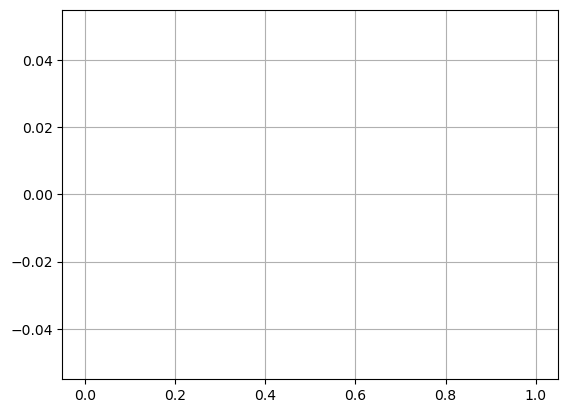

In [41]:
df.covid_cases.hist(bins=50)

In [42]:
def fill_with_percentile(
    df: pd.DataFrame, 
    column: str, 
    percentile: float = 0.03,
    logging: bool = True
):
    
    quantile_value = df[column].quantile(percentile)
    
    if logging:
        print(f'Percentile {percentile} value is: ', quantile_value)
        
    df[column] = df[column].fillna(quantile_value)
    
    return df

In [43]:
df = fill_with_percentile(df, 'covid_cases')

Percentile 0.03 value is:  nan


We could add also information about in which dates the people where closed into their homes.

In [44]:
confinment_start = '2020-03-14'
confinment_date_start = datetime.strptime(confinment_start, '%Y-%m-%d').date()

In [45]:
confinment_end = '2020-06-21'
confinment_date_end = datetime.strptime(confinment_start, '%Y-%m-%d').date()

In [46]:
index_non_confinment = df[
    (df['date'] < confinment_date_start) |
    (df['date'] > confinment_date_end)
].index

In [47]:
    df.loc[index_non_confinment, 'confinment'] = 0
df['confinment'] = df['confinment'].fillna(1)
df['confinment'] = df['confinment'].astype('int')

In [48]:
df['start_date'].value_counts()

KeyError: 'start_date'

### Barcelona Events

In [ ]:
os.makedirs('./events', exist_ok=True)

In [ ]:
def get_opendataevents_json(url: str = 'https://www.bcn.cat/tercerlloc/files/opendatabcn_agenda.json'):
    res = requests.get(url)
    return res.json()

In [ ]:
if not os.path.isfile('./events/opendatabcn_agenda.json'):
    events_json = get_opendataevents_json()
    events_df = pd.DataFrame(events_json)
    events_df.to_csv('./events/opendatabcn_agenda.json', index=False, header=True)

else:
    events_df = pd.read_csv('./events/opendatabcn_agenda.json')

In [ ]:
events_df.head()

In [ ]:
# Only having active dates
events_df = events_df[events_df.core_type_name != 'Equipament']
events_df = events_df[events_df.event_status == 'ok']

In [ ]:
#def events_df_drop_columns(
#    events_df: pd.DataFrame, 
#    columns_to_drop: typing.List[str] = [
#        'register_id', 'prefix', 'suffix', 'name', 'created', 'modified', 'status', 'status_name',     # too specific
#        'core_type', 'core_type_name',                                                                 # most is only one type of value
#        'body', 'tickets_data', 'addresses', 'entity_types_data', 'attribute_categories', 'values',
#        'from_relationships', 'to_relationships', 'classifications_data', 'secondary_filters_data',
#        'timetable', 'image_data', 'gallery_data', 'warnings',                                         # unuseful information
#        'is_section_of_data', 'sections_data', 'estimated_dates', 'languages_data', 'type', 'type_name',
#        'period', 'period_name', 'event_status_name', 'event_status', 'ical',
#        'geo_epgs_25831', 'geo_epgs_23031'                                                             # unwanted loations
#    ]
#):
    
#    return events_df.drop(columns_to_drop, axis=1, errors='ignore')

In [ ]:
# Drop columns not wanted
#events_df = events_df_drop_columns(events_df)

In [ ]:
events_df = events_df.drop(['suffix', 'status', 'status_name', 'values', 'from_relationships', 'to_relationships'], axis=1)
#events_df = events_df.drop(df[df['core_type_name'] == 'Equipament'].index)
events_df = events_df.drop(['core_type', 'core_type_name', 
              'body', 'entity_types_data', 
              'attribute_categories', 'classifications_data', 
             'secondary_filters_data', 'timetable', 
             'image_data', 'warnings', 'is_section_of_data', 'sections_data',
             'type_name', 'period', 'gallery_data', 'addresses'], axis=1)
#events_df = events_df.drop(df[df['event_status'] == 'suspended'].index)
#events_df = events_df.drop(df[df['event_status'] == 'deferred'].index)
events_df = events_df.drop(['event_status_name', 'event_status', 'ical', 'estimated_dates'], axis=1)
events_df = events_df.drop(['geo_epgs_25831', 'geo_epgs_23031'], axis=1)


In [ ]:
events_df = events_df.drop(['created', 'modified'], axis=1)
events_df = events_df.drop(events_df[events_df['type'] == 'permanent'].index)
#I am dropping the permanent events because they do not have significant
#impact of the bicing frequency

In [ ]:
# Drop events with not enough data
events_df.dropna(
    axis=0, 
    how='any', 
    subset=['geo_epgs_4326', 'start_date'], 
    inplace=True
)

In [ ]:
events_df.head()

In [ ]:
def get_event_geographics(geo_position: str):
    geo_position = ast.literal_eval(geo_position)
    return geo_position['x'], geo_position['y']

In [ ]:
events_geographic_x_y = events_df.geo_epgs_4326.apply(lambda x: get_event_geographics(x))
events_df['x'] = [x for x, _ in events_geographic_x_y]
events_df['y'] = [y for _, y in events_geographic_x_y]

events_df = events_df[events_df.x > 0]
events_df = events_df[events_df.y > 0]

events_df.drop(['geo_epgs_4326'], axis=1, inplace=True)

In [ ]:
sns.jointplot(x="x", y="y", data= events_df, alpha=0.1)

In [ ]:
# In the case of null values of end date, we will assume is the same as start date (we will consider only days)
events_df.end_date.fillna(events_df.start_date, inplace=True)

In [ ]:
events_df['start_date'] = pd.to_datetime(events_df['start_date'], utc=True).dt.date
events_df['end_date'] = pd.to_datetime(events_df['end_date'], utc=True).dt.date

events_df['year'] = pd.to_datetime(events_df['start_date'], utc=True).dt.year
print(events_df['year'].value_counts())

### Include the dataframe with the holidays

In [ ]:
from functools import lru_cache
import ics
import icalendar
from icalendar import Calendar, Event, vCalAddress, vText
from pathlib import Path
import pytz

In [ ]:
e = open('calendarifestius_en.ics', 'rb')
ecal = icalendar.Calendar.from_ical(e.read())
for component in ecal.walk():
    print(component.name)
e.close()

In [ ]:
# Extract relevant information
events = []
for event in ecal.walk('VEVENT'):
    event_data = {
        'Summary': event.get('summary'),
        'Start': event.get('dtstart').dt,
        'End': event.get('dtend').dt,
        # Add more properties as needed
    }
    events.append(event_data)

# Create a DataFrame from the extracted information
df_ecal = pd.DataFrame(events)

# Print the DataFrame
print(df_ecal.dtypes)

In [ ]:
df_ecal['Start'] = pd.to_datetime(df_ecal['Start'], utc=True)
df_ecal['End'] = pd.to_datetime(df_ecal['End'], utc=True)
print(df_ecal.dtypes)

In [ ]:
df_ecal = df_ecal.rename(columns={"Start": 'start_date', "End": 'end_date', "Summary":"name"})


In [ ]:
df_ecal['year'] = df_ecal['start_date'].dt.year
df_ecal['month'] = df_ecal['start_date'].dt.month
df_ecal['day'] = df_ecal['start_date'].dt.day

df_ecal['end_day'] = df_ecal['end_date'].dt.day
df_ecal['end_month'] = df_ecal['end_date'].dt.month

In [ ]:
#Since these holidays last the whole week, I will remove them and add
#manually christmas and easter holidays
df_ecal = df_ecal.drop(df_ecal[df_ecal['name'] == 'Good Friday'].index)
df_ecal = df_ecal.drop(df_ecal[df_ecal['name'] == 'Easter Monday'].index)
df_ecal = df_ecal.drop(df_ecal[df_ecal['name'] == 'Christmas'].index)
df_ecal = df_ecal.drop(df_ecal[df_ecal['name'] == 'Boxing Day'].index)

In [ ]:
def holy_week(df, name, start_date, end_date):
    df = pd.DataFrame({'name': [name], 'start_date': [start_date],
                              'end_date' : [end_date]})
    df['start_date'] = pd.to_datetime(df['start_date'], utc=True)
    df['end_date'] = pd.to_datetime(df['end_date'], utc=True)
    df['day'] = df['start_date'].dt.day
    df['month'] = df['start_date'].dt.month
    df['year'] = df['start_date'].dt.year
    df['end_day'] = df['end_date'].dt.day
    df['end_month'] = df['end_date'].dt.month
    return df
   
holy_week_2023 = holy_week(df, 'Holy Week 2023', "2023-04-02 00:00:00+00:00", "2023-04-10 00:00:00+00:00")
holy_week_2022 = holy_week(df, 'Holy Week 2022', "2022-04-10 00:00:00+00:00", "2022-04-18 00:00:00+00:00")
holy_week_2021 = holy_week(df, 'Holy Week 2021', "2021-03-28 00:00:00+00:00", "2021-04-05 00:00:00+00:00")
holy_week_2020 = holy_week(df, 'Holy Week 2020', "2020-04-05 00:00:00+00:00", "2020-04-13 00:00:00+00:00")
holy_week_2019 = holy_week(df, 'Holy Week 2019', "2019-04-14 00:00:00+00:00", "2019-04-22 00:00:00+00:00")


df_ecal = df_ecal.append(holy_week_2023, ignore_index=True)
df_ecal = df_ecal.append(holy_week_2022, ignore_index=True)
df_ecal = df_ecal.append(holy_week_2021, ignore_index=True)
df_ecal = df_ecal.append(holy_week_2020, ignore_index=True)
df_ecal = df_ecal.append(holy_week_2019, ignore_index=True)
df_ecal.head()

In [ ]:
def xmas_time(df, name, start_date, end_date):
    df = pd.DataFrame({'name': [name], 'start_date': [start_date],
                              'end_date' : [end_date]})
    df['start_date'] = pd.to_datetime(df['start_date'], utc=True)
    df['end_date'] = pd.to_datetime(df['end_date'], utc=True)
    df['day'] = df['start_date'].dt.day
    df['month'] = df['start_date'].dt.month
    df['year'] = df['start_date'].dt.year
    df['end_day'] = df['end_date'].dt.day
    df['end_month'] = df['end_date'].dt.month
    return df
   
xmas_2023 = xmas_time(df, 'Christmas 2023', "2023-12-25 00:00:00+00:00", "2024-01-02 00:00:00+00:00")
xmas_2022 = xmas_time(df, 'Christmas 2022', "2022-12-25 00:00:00+00:00", "2023-01-02 00:00:00+00:00")
xmas_2021 = xmas_time(df, 'Christmas 2021', "2021-12-25 00:00:00+00:00", "2022-01-02 00:00:00+00:00")
xmas_2020 = xmas_time(df, 'Christmas 2020', "2020-12-25 00:00:00+00:00", "2021-01-02 00:00:00+00:00")
xmas_2019 = xmas_time(df, 'Christmas 2019', "2019-12-25 00:00:00+00:00", "2020-01-02 00:00:00+00:00")


df_ecal = df_ecal.append(xmas_2023, ignore_index=True)
df_ecal = df_ecal.append(xmas_2022, ignore_index=True)
df_ecal = df_ecal.append(xmas_2021, ignore_index=True)
df_ecal = df_ecal.append(xmas_2020, ignore_index=True)
df_ecal = df_ecal.append(xmas_2019, ignore_index=True)
df_ecal.head()

In [ ]:
print(df_ecal.shape)

# Define a function to duplicate rows based on the days between 'starting_date' and 'ending_date'
def duplicate_rows(row):
    date_range = pd.date_range(start=row['start_date'], end=row['end_date'], closed='left')
    duplicated_rows = pd.DataFrame({'start_date': date_range[1:]}, index=range(1, len(date_range)))
    return duplicated_rows

# Apply the function to each row and concatenate the results
duplicated_df = pd.concat(df_ecal.apply(duplicate_rows, axis=1).tolist())
duplicated_df['day'] = duplicated_df['start_date'].dt.day
duplicated_df['month'] = duplicated_df['start_date'].dt.month
duplicated_df['year'] = duplicated_df['start_date'].dt.year
# Merge duplicated rows with the original DataFrame
df_ecal = pd.concat([df_ecal, duplicated_df], ignore_index=True)

print(df_ecal.shape)

In [ ]:
# Define the condition
condition = (df_ecal['year'] == 2023) & (df_ecal['month'] == 4)
# Modify the values of column 'c' where the condition is True
df_ecal.loc[condition, 'name'] = 'Holy week 2023'

# Define the condition
condition_22 = (df_ecal['year'] == 2022) & (df_ecal['month'] == 4)
# Modify the values of column 'c' where the condition is True
df_ecal.loc[condition_22, 'name'] = 'Holy week 2022'

# Define the condition
condition_21 = (df_ecal['year'] == 2021) & (df_ecal['month'] == 4)
# Modify the values of column 'c' where the condition is True
df_ecal.loc[condition_21, 'name'] = 'Holy week 2021'

# Define the condition
condition_21 = (df_ecal['year'] == 2021) & (df_ecal['month'] == 3)
# Modify the values of column 'c' where the condition is True
df_ecal.loc[condition_21, 'name'] = 'Holy week 2021'

# Define the condition
condition_20 = (df_ecal['year'] == 2020) & (df_ecal['month'] == 4)
# Modify the values of column 'c' where the condition is True
df_ecal.loc[condition_20, 'name'] = 'Holy week 2020'

# Define the condition
condition_19 = (df_ecal['year'] == 2019) & (df_ecal['month'] == 4)
# Modify the values of column 'c' where the condition is True
df_ecal.loc[condition_19, 'name'] = 'Holy week 2019'

print(df_ecal.shape)

In [ ]:
df_ecal = df_ecal.sort_index(axis=0)
df_ecal

In [ ]:
# XMAS 2023-2024
condition = (df_ecal['year'] == 2023) & (df_ecal['month'] == 12)
df_ecal.loc[condition, 'name'] = 'Christmas 2023'

condition = (df_ecal['year'] == 2024) & (df_ecal['month'] == 1)
df_ecal.loc[condition, 'name'] = 'Christmas 2023'

# XMAS 2022-2023
condition_22 = (df_ecal['year'] == 2022) & (df_ecal['month'] == 12)
df_ecal.loc[condition_22, 'name'] = 'Christmas 2022'

condition_22 = (df_ecal['year'] == 2023) & (df_ecal['month'] == 1)
df_ecal.loc[condition_22, 'name'] = 'Christmas 2022'

# XMAS 2021-2022
condition_21 = (df_ecal['year'] == 2021) & (df_ecal['month'] == 12)
df_ecal.loc[condition_21, 'name'] = 'Christmas 2021'

condition_21 = (df_ecal['year'] == 2022) & (df_ecal['month'] == 1)
df_ecal.loc[condition_21, 'name'] = 'Christmas 2021'

# XMAS 2020-2021
condition_20 = (df_ecal['year'] == 2020) & (df_ecal['month'] == 12)
df_ecal.loc[condition_20, 'name'] = 'Christmas 2020'

condition_20 = (df_ecal['year'] == 2021) & (df_ecal['month'] == 1)
df_ecal.loc[condition_20, 'name'] = 'Christmas 2020'

# XMAS 2019-2020
condition_19 = (df_ecal['year'] == 2019) & (df_ecal['month'] == 12)
df_ecal.loc[condition_19, 'name'] = 'Christmas 2019'

condition_19 = (df_ecal['year'] == 2020) & (df_ecal['month'] == 1)
df_ecal.loc[condition_19, 'name'] = 'Christmas 2019'

In [ ]:
df_ecal.head()

In [ ]:
# Define the condition to drop rows prior to a specific datetime
condition_1 = df_ecal['start_date'] < pd.to_datetime('2019-03-28 00:00:00+00:00', utc=True)
print(df_ecal.shape)
condition_2 = df_ecal['start_date'] > pd.to_datetime('2023-04-30 00:00:00+00:00', utc=True)
# Drop the rows that satisfy the condition
df_ecal = df_ecal.drop(df_ecal[condition_1].index)
df_ecal = df_ecal.drop(df_ecal[condition_2].index)
print(df_ecal.shape)

In [ ]:
df_ecal = df_ecal.drop(['end_date', 'end_day', 'end_month'], axis=1)

## Append df events_df together with the df_ecal, although it is probably unneccessary.

In [ ]:
df_append = events_df.append(df_ecal, ignore_index=True)

In [ ]:
#For the moment I am going to drop the tickets and the language,
#unless we found a way to be related
df_append = df_append.drop(['tickets_data', 'languages_data'], axis=1)

In [ ]:
df_append['period_name'] = df_append['period_name'].fillna(0)
df_append['period_name'] = np.where(df_append['period_name'] == 0, 'anual', df_append['period_name'])

df_append['type'] = df_append['type'].fillna(0)
df_append['type'] = np.where(df_append['type'] == 0, 'repetitive', df_append['type'])

df_append['prefix'] = df_append['prefix'].fillna(0)
df_append['prefix'] = np.where(df_append['prefix'] == 0, 'Local holiday', df_append['prefix'])


In [ ]:
# Define the condition
condition_holy_week = df_append['name'].str.startswith('Holy') == True

# Modify the values of column 'c' where the condition is True
df_append.loc[condition_holy_week, 'type'] = 'unique'

In [ ]:
# Define the condition
condition_xmas = df_append['name'].str.startswith('Christmas') == True

# Modify the values of column 'c' where the condition is True
df_append.loc[condition_xmas, 'type'] = 'unique'

In [ ]:
# Define the condition to drop rows prior to a specific datetime
condition_1 = df_append['start_date'] < pd.to_datetime('2019-03-28 00:00:00+00:00', utc=True)
print(df_append.shape)
condition_2 = df_append['start_date'] > pd.to_datetime('2023-04-30 00:00:00+00:00', utc=True)
# Drop the rows that satisfy the condition
df_append = df_append.drop(df_append[condition_1].index)
df_append = df_append.drop(df_append[condition_2].index)
print(df_append.shape)

In [ ]:
# Filter out by maximum and minimum dates of df
#df_min_date, df_max_date = df.date.min(), df.date.max()

#events_df = events_df[events_df.start_date > df_min_date]
#events_df = events_df[events_df.end_date < df_max_date]

In [ ]:
print(df_append.shape)
df_append.head()

## These are the data sets that we have:
events_df --> the events happening in Barcelona, with specific location
df_ecal --> calendar with the local holidays in Barcelona
df_append --> append of the two previous dataframes. I don't think we need it

In [ ]:
std_dev_x, std_dev_y = events_df.x.std(), events_df.y.std()

In [ ]:
# Filter df by the dates that we have
df_common_events = pd.concat(
    [
        pd.merge(df, events_df, left_on='date', right_on='start_date'), 
        pd.merge(df, events_df, left_on='date', right_on='end_date')
    ],
    axis=0
).drop_duplicates()

In [ ]:
print(df_common_events.shape)

print(df_common_events['year_x'].value_counts())

In [ ]:
with tqdm(total=len(events_df)) as pbar:
    for idx, row in events_df.iterrows():    
        # Filter by the range of the dates
        x, y = row.x, row.y
        start_date, end_date = row['start_date'], row['end_date']
        range_dates = pd.date_range(start_date, end_date)
        range_df = df_common_events[df_common_events.date.isin(range_dates)]
        
        if len(range_df) > 0:
            # Near position of the event with relation of the biking center (30% of standard deviations of x & y)
            range_df = range_df[(range_df.lat > x - std_dev_x * 0.3) & (range_df.lat < x + std_dev_x * 0.3)]
            range_df = range_df[(range_df.lat > y - std_dev_y * 0.3) & (range_df.lat < y + std_dev_y * 0.3)]
            df.loc[range_df.index, 'has_event'] = 1

        pbar.update(1)
    

In [ ]:
df.has_event = df.has_event.fillna(0)

In [ ]:
df.head()

In [ ]:
df['year'].value_counts()

In [ ]:
df.columns.values

In [ ]:
df_ecal = df_ecal.rename(columns={"start_date": 'date_time'})
df_ecal['has_holidays'] = df_ecal['name']
df_ecal['has_holidays'] = 1

df_ecal['date'] = pd.to_datetime(df_ecal['date_time']).dt.date


In [ ]:
print(df_ecal['date_time'].dtype)
print(df['date_time'].dtype)

In [ ]:
df_ecal['date_time'] = pd.to_datetime(df_ecal.date_time).dt.tz_localize(None)
df_ecal['date_time'] = df_ecal['date_time'].astype('object')

Merge main dataset with df_ecal 

In [ ]:
df_copy = df.copy()
df_merge = pd.merge(df_copy, df_ecal, on=['year', 'month', 'day', 'date'])

In [ ]:
df_merge['year'].value_counts()

In [ ]:
df_merge.has_holidays = df_merge.has_holidays.fillna(0)

Once we have extended our dataframe with external sources, we are going to make the selection of the columns that we want.

In [ ]:
selected_columns_df = [
    'station_id', 
    'num_bikes_available', 'num_bikes_available_types.mechanical',                            # docks info
    'num_bikes_available_types.ebike', 'num_docks_available', 'percentage_docks_available',   # docks info
    'status', 'lat', 'lon', 'altitude', 'capacity',                                           # station info
    'year', 'month', 'day', 'hour', 'date_time_x', 'date_time_y', 'date',                                      # time info
    'traffic', 'covid_cases', 'confinment', 'has_event', 'has_holidays',                                     # context info
    'temp', 'feelslike', 'humidity', 'precip', 'snow', 'windspeed', 'uvindex', 'visibility',  # meteorological info
]

selected_df = df_merge[selected_columns_df]

In [ ]:
# Checkpoint of the extended df with external sources
selected_df.to_csv(
    'df_selected.csv.gz', 
    index=False, 
    header=True, 
    compression='gzip'
)

In [ ]:
file = pd.read_csv('df_processed.csv')
csv_file = pd.DataFrame(file)
csv_file['year'].value_counts()

## Data Engineering

Engineer new variables from the information that we already have. 

In [ ]:
selected_df.date_time_x = pd.to_datetime(selected_df.date_time_x)

### Time

In [ ]:
# Would need to get the dummies for them
date_time_fields = ['day_info', 'hour_info', 'month_info']

Related to the **day** (weekend).

In [ ]:
def get_day_info(date_time_x):
    return 'weekend' if date_time_x.weekday() in [5, 6] else 'weekday'

In [ ]:
selected_df['day_info'] = selected_df.date_time_x.apply(lambda x: get_day_info(x))

Related to the **hour** (which time of day it was).

In [ ]:
def get_hour_info(date_time):
    if date_time.hour in range(5):
        return 'late_night'

    elif date_time.hour in range(5, 9):
        return 'early_morning'

    elif date_time.hour in range(9, 13):
        return 'morning'
    
    elif date_time.hour in range(13, 17):
        return 'noon'
    
    elif date_time.hour in range(17, 21):
        return 'eve'
    
    return 'night'

In [ ]:
selected_df['hour_info'] = selected_df.date_time_x.apply(lambda x: get_hour_info(x))

Related to the **month** (season).

In [ ]:
def get_month_info(date):
    if date.month in (3, 4, 5):
        return 'spring'
    
    elif date.month in (6, 7, 8):
        return 'summer'
    
    elif date.month in (9, 10, 11):
        return 'autumn'
    
    return 'winter'

In [ ]:
selected_df['month_info'] = selected_df.date_time_x.apply(lambda x: get_month_info(x))

In [ ]:
selected_df.head()

### Data Shifting

We need to create a shift of the availability in the previous availabilities.

In [ ]:
selected_df = selected_df.sort_values(['station_id', 'date_time_x'], ascending=True)

In [ ]:
df_shifted = pd.DataFrame()

In [ ]:
for station_id in tqdm(selected_df.station_id.unique()):
    station_df = selected_df[selected_df.station_id == station_id]
    station_df['ctx-4'] = station_df.percentage_docks_available.shift(4)
    station_df['ctx-3'] = station_df.percentage_docks_available.shift(3)
    station_df['ctx-2'] = station_df.percentage_docks_available.shift(2)
    station_df['ctx-1'] = station_df.percentage_docks_available.shift(1)
    
    df_shifted = pd.concat([station_df, df_shifted], axis=0)

In [ ]:
df_shifted.head()

### Train / Val / Test Split

In [ ]:
df_shifted.head()

In [ ]:
train_df = df_shifted[df_shifted.year != 2023]
test_df = df_shifted[df_shifted.year == 2023]

In [ ]:
print('Train size: ', train_df.shape[0])
print('Test size: ', test_df.shape[0])

In [ ]:
valid_df = test_df[test_df.month <= 3]
test_df = test_df[test_df.month > 3]

### Exploration

In [ ]:
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn import model_selection
from sklearn import neighbors

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#For plotting the variables
selected_columns_df = [
    'station_id', 
    'num_bikes_available', 'num_bikes_available_types.mechanical',                            # docks info
    'num_bikes_available_types.ebike', 'num_docks_available', 'percentage_docks_available',   # docks info
    'status', 'lat', 'lon', 'altitude', 'capacity',                                           # station info
    'year', 'month', 'day', 'hour', 'date_time', 'date',                                      # time info
    'traffic', 'covid_cases', 'confinment', 'has_event', 'has_holidays',                                     # context info
    'temp', 'feelslike', 'humidity', 'precip', 'snow', 'windspeed', 'uvindex', 'visibility', # meteorological info
    'day_info', 'hour_info', 'month_info', #data engineering
    'ctx_1', 'ctx_2', 'ctx_3', 'ctx_4', #shifting
]


In [ ]:
#Get dummies from categorical values (One-Hot encoder)
def get_dummies(df, column_name):
    type_feature = df[column_name]
    type_dummies = pd.get_dummies(type_feature, prefix=column_name)
    df = pd.concat([df, type_dummies], axis=1).drop(columns=[column_name])
    return df

df_shifted = get_dummies(df_shifted, 'day_info')
df_shifted = get_dummies(df_shifted, 'month_info')
df_shifted = get_dummies(df_shifted, 'hour_info')

In [ ]:
train_df.head()

In [ ]:
train_df = train_df['covid_cases'].fillna(0)

In [ ]:
train_df = train_df['ctx-4'].fillna(0)
train_df = train_df['ctx-3'].fillna(0)
train_df = train_df['ctx-2'].fillna(0)
train_df = train_df['ctx-1'].fillna(0)

In [ ]:
#Prepare data in X and Y
X_train = train_df.copy()
X_train = X_train.drop(["percentage_docks_available"], axis=1)
y_train = train_df["percentage_docks_available"].copy()

X_val = valid_df.copy()
X_val = X_val.drop("percentage_docks_available", axis=1)
y_val = valid_df["percentage_docks_available"].copy()

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) # Create the transformer StandardScaler and perform the fitting for the training data

X_train_norm = scalerX.transform(X_train)
X_val_norm = scalerX.transform(X_val)

print("\nBefore transformation:")
print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train), np.min(X_train), np.mean(X_train), np.var(X_train)))
print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_val), np.min(X_val), np.mean(X_val), np.var(X_val)))

print("\nAfter transformation:")
print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train_norm), np.min(X_train_norm), np.mean(X_train_norm), np.var(X_train_norm)))
print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_val_norm), np.min(X_val_norm), np.mean(X_val_norm), np.var(X_val_norm)))


### LOGISTIC REGRESSION

In [ ]:
#Fit with linear_model: Logistic Regression
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
'''
Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]

‘newton-cholesky’ - [‘l2’, None]

‘sag’ - [‘l2’, None]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
'''
logreg = LogisticRegression(solver = 'saga')
logreg.fit(X_train_norm, y_train)

print(logreg.coef_, logreg.intercept_)
losspred = logreg.predict(X_val_norm)


print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",mean_squared_error(y_val, losspred, squared=False))  # This is the competition's metric
print("R^2: ",r2_score(y_val, losspred))

# Using this lines of code we can see the predicted price vs the real price
plt.scatter(y_val, losspred, c='C0', alpha=0.3)
plt.axline((0,0),(1,1), c='C1')
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()


CONFUSION MATRIX OF THE LOGISTIC REGRESSION

In [ ]:
cm = metrics.confusion_matrix(y_val, losspred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### K-NEIGHBORS CLASSIFIER WITH CROSS VALIDATION

In [ ]:
k_values = [i for i in range (1,101)]
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_norm, y_train, cv=5)
    knn_scores.append(np.mean(score))
    
sns.lineplot(x = 'k_values', y = 'knn_scores', marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
#We now train our model with the best k values
best_index = np.argmax(knn_scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_norm, y_train)

In [ ]:
y_pred = knn.predict(X_val_norm)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",mean_squared_error(y_val, y_pred, squared=False))  # This is the competition's metric
print("R^2: ",r2_score(y_val, y_pred))

# Using this lines of code we can see the predicted price vs the real price
plt.scatter(y_val, y_pred, c='C0', alpha=0.3)
plt.axline((0,0),(1,1), c='C1')
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

### DEEP LEARNING, FULLY-CONNECTED NEURAL NETWORK

In [ ]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
model = Sequential()

In [ ]:
#Set the real number of variables of our final df in input_shape
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_norm, y_train, epochs=150, batch_size=10)
_, accuracy = model.evaluate(X, y, verbose=0)

In [ ]:
# make probability predictions with the model
y_pred_FCNN = model.predict(X_val_norm)

### SUBMISSION DATA SET

In [ ]:
# First, and very important step, we need to preprocess the test data the same way we have done with the train set. 
X_test = test_set[features].fillna(0)

# Now we can predict the prices for the test set
y_test_pred = model.predict(X_test)

# We generate the submission like this:
df_output = pd.DataFrame(y_test_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','percentage_docks_available']

df_output.to_csv('sample_submission.csv',index=False)
